In [91]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [92]:
df2 = pd.read_csv("../../Data/03.통합.csv")
sido_df = df2.iloc[:, :2]
sido_df

df = pd.read_csv("../../Data/companies/통합_k.csv")
df = df[['전출인구',	'출생아수',	'산부인과의원수',	'초등학생인원수',	'도매 및 소매업 신생', 'cluster_id']]

df = pd.concat([sido_df, df], axis=1)
df

,년도,시도,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,cluster_id
0,2013,경기도,1821303,112129,286,739619,49143,2
1,2013,서울특별시,1620640,84066,395,469392,48097,1
2,2013,경상남도,423864,29504,65,190166,12612,3
3,2013,부산광역시,496161,25831,82,160821,13902,3
4,2013,대구광역시,363224,19340,86,136309,9981,3
...,...,...,...,...,...,...,...,...
131,2020,충청북도,226441,8607,40,85135,6103,0
132,2020,대전광역시,243418,7481,44,79807,6405,0
133,2020,강원도,217897,7835,32,73478,5554,0
134,2020,제주특별자치도,94736,3989,23,40575,2856,0


In [93]:
df[df['시도'] == '세종특별자치시']
df.drop([16, 33, 50, 67, 84, 101, 118, 135], inplace=True)
df

,년도,시도,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,cluster_id
0,2013,경기도,1821303,112129,286,739619,49143,2
1,2013,서울특별시,1620640,84066,395,469392,48097,1
2,2013,경상남도,423864,29504,65,190166,12612,3
3,2013,부산광역시,496161,25831,82,160821,13902,3
4,2013,대구광역시,363224,19340,86,136309,9981,3
...,...,...,...,...,...,...,...,...
130,2020,울산광역시,149696,6617,34,67397,3754,0
131,2020,충청북도,226441,8607,40,85135,6103,0
132,2020,대전광역시,243418,7481,44,79807,6405,0
133,2020,강원도,217897,7835,32,73478,5554,0


In [94]:
from sklearn.cluster import KMeans

df_temp = df.iloc[:, 2:].copy()
# df_temp.set_index('시도', inplace=True)
df_km = df_temp

data_points = df_km.values
km = KMeans(n_clusters=4).fit(data_points) # n_clusters 에 값을 정해주기!
df_km['cluster_id'] = km.labels_

df_km['cluster_id'] = df_km['cluster_id'] + 10
df_km_temp = df_km.sort_values(by='전출인구', ascending=True)
temp_list = df_km_temp['cluster_id'].unique()

# 클러스터 0~1로 변경
i = 3
for temp in temp_list:
    df_km['cluster_id'][df_km['cluster_id'] == temp] = i
    i-=1
df_km['cluster_id'] = np.round(df_km['cluster_id'] / 3, 2)
df_km['cluster_id'].unique()

# Feature, Target
data = df_km[['전출인구', '출생아수', '산부인과의원수', '초등학생인원수', '도매 및 소매업 신생']].to_numpy()
target = df_km['cluster_id'].to_numpy()

# 데이터셋 나누기 
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = \
    train_test_split(data, target, test_size=0.2) # random_state=42,  stratify=target
    
# 회귀 예측
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input, train_target)
print("Train score:", lr.score(test_input, test_target))

Train score: 0.8130375575178731


In [95]:
pred_cluster = []

for i in range(len(df_km)):
    pred_cluster.append(lr.predict([[df.iloc[i,2], df.iloc[i,3], df.iloc[i,4], df.iloc[i,5], df.iloc[i,6]]]))

df_km['pred_cluster'] = pred_cluster
df_km = pd.concat([df.iloc[:,:2], df_km], axis=1)
df_km

,년도,시도,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,cluster_id,pred_cluster
0,2013,경기도,1821303,112129,286,739619,49143,0.00,[-0.031027706360032603]
1,2013,서울특별시,1620640,84066,395,469392,48097,0.33,[0.2283965493331308]
2,2013,경상남도,423864,29504,65,190166,12612,0.67,[0.7693846358006768]
3,2013,부산광역시,496161,25831,82,160821,13902,0.67,[0.7890150512061067]
4,2013,대구광역시,363224,19340,86,136309,9981,0.67,[0.8354220859948932]
...,...,...,...,...,...,...,...,...,...
130,2020,울산광역시,149696,6617,34,67397,3754,1.00,[0.9500098489508236]
131,2020,충청북도,226441,8607,40,85135,6103,1.00,[0.918963809469523]
132,2020,대전광역시,243418,7481,44,79807,6405,1.00,[0.9222675014946191]
133,2020,강원도,217897,7835,32,73478,5554,1.00,[0.9345854373434481]


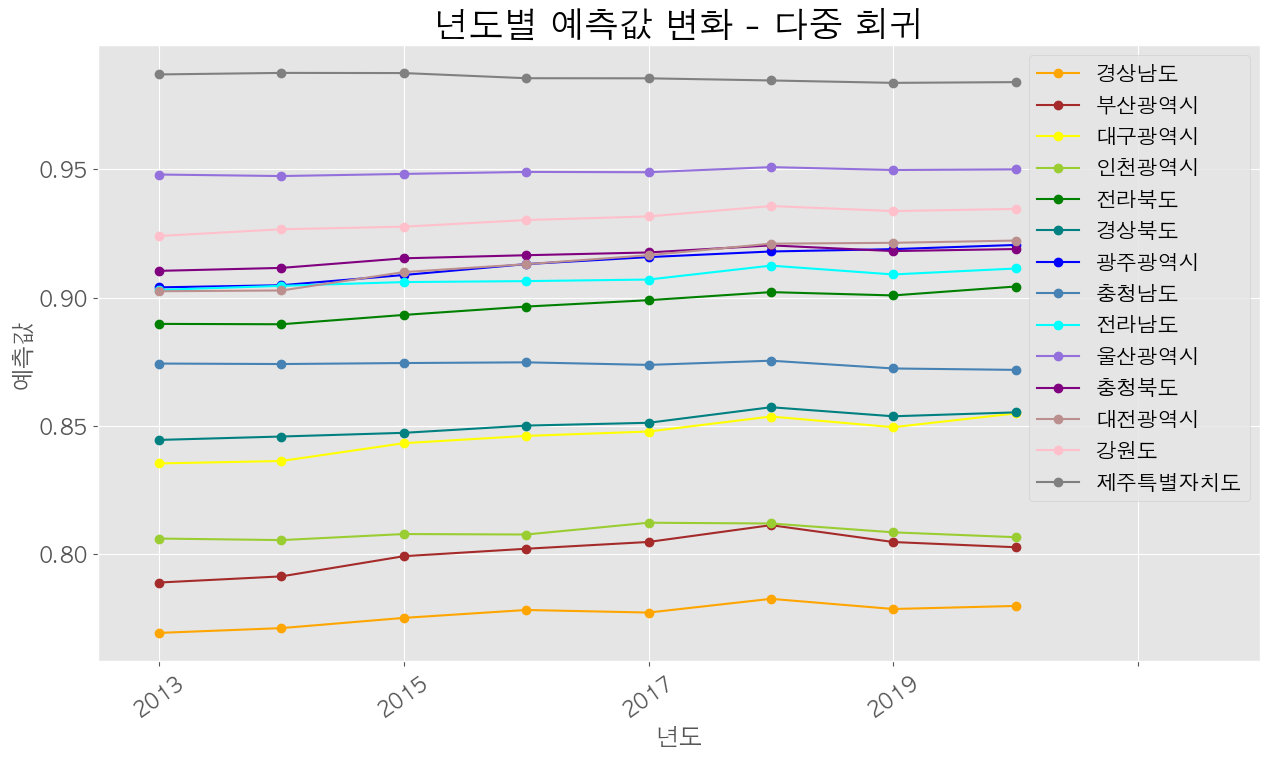

In [96]:
plt.style.use('ggplot')

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1) #하나짜리 그래프

sido = pd.unique(df_km.시도)
years = list(range(8))
colors = ['red', 'salmon', 'orange', 'brown', 'yellow', 'yellowgreen', 'green', 'teal', 'blue', 'steelblue', 'cyan', 'mediumpurple', 'purple', 'rosybrown', 'pink', 'gray']

for i in [2,3,4,5,6,7,8,9,10,11,12,13,14,15]:
    
    ax.plot(
        years,
        df_km[df_km['시도'] == sido[i]]['pred_cluster'],
        marker='o',
        label=sido[i],
        color=colors[i]
    )

ax.legend(loc='best', fontsize=15)
ax.set_xlim(-0.5, 9)
# ax.set_ylim(0.75, 1.05)
plt.yticks(fontsize=15)
ax.set_title('년도별 예측값 변화 - 다중 회귀', size=25)
ax.set_ylabel('예측값', fontsize=17)
ax.set_xlabel('년도', fontsize=17)
ax.set_xticklabels([0, 2013, 2015, 2017, 2019], rotation=35, fontsize=15)
# ax.set_yticklabels([0.75, 0.80, 0.85, 0.9, 0.95, 1.00, 1.05], fontsize=15)

plt.show()

In [106]:
sidos = pd.unique(df_km['시도'])
sidos

array(['경기도', '서울특별시', '경상남도', '부산광역시', '대구광역시', '인천광역시', '전라북도', '경상북도',
       '광주광역시', '충청남도', '전라남도', '울산광역시', '충청북도', '대전광역시', '강원도',
       '제주특별자치도'], dtype=object)

## 경기도

In [101]:
# 함수 만들기
def make80(sido):
    # 경기도 데이터만 고르기
    gyeong = df_km[df_km['시도'] == sido]

    # Feature, Target
    data = gyeong[['년도']].to_numpy()
    target = gyeong['pred_cluster'].to_numpy()

    # 회귀 예측 -> 기울기, 절편
    from sklearn.linear_model import LinearRegression
    lr = LinearRegression()
    lr.fit(data, target)
    return (lr.coef_ * 2103 + lr.intercept_)

In [108]:
import joblib

for i in sido:
    make80(i)
    filename = f"../../Data/companies/lr_{i}.h5"
    joblib.dump(lr, filename)

In [103]:
# 경기도
make80('경기도')


filename = "../../Data/companies/lr_gyeonggi.h5"
joblib.dump(lr, filename)

['../../Data/companies/lr_gyeonggi.h5']

In [104]:
# 서울
make80('서울특별시')

filename = "../../Data/companies/lr_seoul.h5"
joblib.dump(lr, filename)

['../../Data/companies/lr_seoul.h5']

In [105]:
# 경남
make80('경상남도')

filename = "../../Data/companies/lr_gyeongnam.h5"
joblib.dump(lr, filename)

['../../Data/companies/lr_gyeongnam.h5']

In [ ]:
# 부산
make80('부산광역시')